# Querying datasets

In [1]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob
import symphony_data as sd
import tqdm

import sys
sys.path.append('../dj_modules/')
import dj_metadata as djm
import dj_populate as djp

import pandas as pd
sys.path.append('../data_modules/')
import spikeoutputs as so
import spikeplots as sp

[2025-02-05 11:47:46,351][INFO]: Connecting root@127.0.0.1:3306
[2025-02-05 11:47:46,507][INFO]: Connected root@127.0.0.1:3306


In [2]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

In [15]:
ls_protocols = djm.search_protocol('AdaptNoise')
print(ls_protocols)

['manookinlab.protocols.AdaptNoiseColorSteps', 'manookinlab.protocols.AdaptNoiseSpatial']


In [17]:
df_meta = djm.meta_from_protocol(ls_protocols)
df_meta = df_meta.reset_index()
df_meta['dataset'] = df_meta['date_id'] + '_' + df_meta['chunk_id']
df_meta

,date_id,protocol_id,group_idx,data_file,block_idx,chunk_id,frame_times,n_epochs,group_label,source_label,dataset
0,20230530C,manookinlab.protocols.AdaptNoiseColorSteps,0,data005,0,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",5,chromatic noise,20230530Cm1,20230530C_chunk1
1,20230607C,manookinlab.protocols.AdaptNoiseColorSteps,0,data006,0,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",5,Adapt noise,20230607Cm1,20230607C_chunk1
2,20230613C,manookinlab.protocols.AdaptNoiseColorSteps,0,data004,0,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",5,achromatic noise,20230613Cm1,20230613C_chunk1
3,20230613C,manookinlab.protocols.AdaptNoiseColorSteps,1,data014,0,chunk2,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",5,adapt noise spatial,20230613Cm1,20230613C_chunk2
4,20230613C,manookinlab.protocols.AdaptNoiseColorSteps,2,data002,1,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",1,chromatic noise,20230613Cm1,20230613C_chunk1
5,20230613C,manookinlab.protocols.AdaptNoiseColorSteps,2,data003,0,chunk1,"[[0.0, 16.0, 33.0, 50.0, 66.0, 83.0, 99.0, 116...",3,chromatic noise,20230613Cm1,20230613C_chunk1
6,20230614C,manookinlab.protocols.AdaptNoiseColorSteps,0,data004,0,chunk1,"[[0.0, 16.0, 33.0, 50.0, 66.0, 83.0, 99.0, 116...",5,adapt noise spatial,20230614Cm1,20230614C_chunk1
7,20230614C,manookinlab.protocols.AdaptNoiseColorSteps,1,data005,0,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",5,adapt noise temporal,20230614Cm1,20230614C_chunk1
8,20230621C,manookinlab.protocols.AdaptNoiseColorSteps,0,data002,1,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",7,noise,20230621Cm1,20230621C_chunk1
9,20230621C,manookinlab.protocols.AdaptNoiseColorSteps,0,data003,0,chunk1,"[[0.0, 16.0, 33.0, 49.0, 66.0, 83.0, 99.0, 116...",10,noise,20230621Cm1,20230621C_chunk1


## Plot mosaics for datasets

In [10]:
import importlib
importlib.reload(djm)
df_ct = djm.celltyping_from_meta(df_meta, verbose=True)

no cell typing for 20230530C chunk1
no cell typing for 20230607C chunk1
no cell typing for 20230613C chunk2
no cell typing for 20230614C chunk1
no cell typing for 20230621C chunk1
no cell typing for 20230719C chunk1
no cell typing for 20230725C chunk1
no cell typing for 20230802C chunk2
no cell typing for 20230808C chunk1
No cell typing for 9 chunks
No cell typing for 8 dates
No quality found for 20230613C chunk1


In [11]:
df_ct

,date_id,protocol_id,group_idx,noise_data_file,block_idx,chunk_id,noise_data_files,algorithm,b_typing_file_exists,typing_file,num_cells,num_goodcells,num_on_p,num_off_p,num_on_m,num_off_m,num_sbc,quality
0,20230613C,manookinlab.protocols.FastNoise,0,data000,0,chunk1,data000,kilosort2,1,/Volumes/data-1/analysis/20230613C/chunk1/kilo...,925,925,64,137,43,256,0,Empty


In [13]:
def create_data_objs(df_ct, algo='kilosort2'):
    # Move multiindex to columns
    df_ct = df_ct.reset_index()

    # Create SpikeOutputs objects for each date-chunk pair with a valid typing file.
    d_data_objs = {}
    
    # Iterate through all date_id and chunk_id in df_ct
    df_ct = df_ct[df_ct['algorithm']==algo]

    dates = df_ct['date_id'].unique()
    for date_id in dates:
        chunks = df_ct[df_ct['date_id']==date_id]['chunk_id'].unique()

        for chunk_id in chunks:
            typing_files = df_ct[(df_ct['date_id']==date_id) & (df_ct['chunk_id']==chunk_id)]['typing_file'].unique()

            for idx_t, typing_file in enumerate(typing_files):
                # Get sum of num_on_p etc for each typing file
                mask = (df_ct['date_id']==date_id) & (df_ct['chunk_id']==chunk_id) & (df_ct['typing_file']==typing_file)
                n_cells = df_ct[mask].loc[:, 'num_on_p':'num_sbc'].values.sum()
                if n_cells==0:
                    print(f"ERROR: {typing_file} has no cell types corresponding to defined labels")
                else:
                    
                    d_paths =  {
                    "str_experiment": date_id,
                    
                    "dataset_name": algo,
                    "str_algo": algo,
                    # "str_chunk": chunk_id,
                    "str_classification": typing_file,
                    "str_protocol": "noise",
                    "paramsfile": f'/Volumes/data-1/analysis/{date_id}/{chunk_id}/{algo}/{algo}.params',
                    }

                    data = so.SpikeOutputs(**d_paths)
                    data.load_sta_from_params()
                    
                    str_key = f'{date_id}_{chunk_id}_{idx_t}'
                    d_data_objs[str_key] = data
    return d_data_objs
d_data_objs = create_data_objs(df_ct)

Loading STA from /Volumes/data-1/analysis/20230613C/chunk1/kilosort2/kilosort2.params...
Loaded STA for 925 cells.


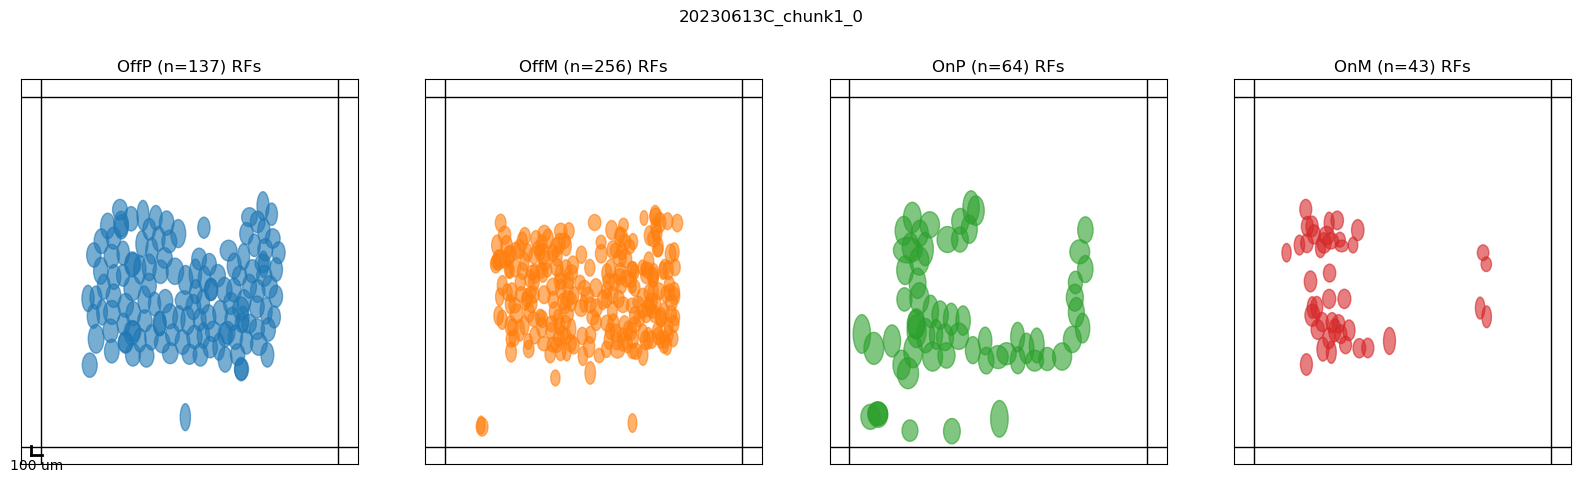

In [14]:
importlib.reload(sp)
for str_key, data in d_data_objs.items():
    axs=sp.plot_type_rfs(data, b_zoom=False, sd_mult=0.8)
    plt.suptitle(str_key, y=1.02)